### Exercise 06.1

Completare il codice dato per simulare il modello di Ising 1D con

- L' Algoritmo del Metropolis-Hastings
- L'algoritmo di Gibbs

Per investigare il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$,
Aggiungere anche la possibilià di rincominciare da una configurazione di spin precedente.

Aggiungere il calcolo di $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ e calcolare:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

come funzione di $T$ in the range $\left[0.5;2.0\right]$ per un sistema di $N=50$ spins con $J=1$.



- <span style="color:red">Mostrare grafici di $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ e la loro incertezza</span> per poi compararli con le curve esatte. 

# Campionamento di Gibbs

Il concetto chiave del campionamento di Gibbs è che, in certi casi, può essere più semplice campionare partendo dalle distribuzioni condizionate. Consideriamo una variabile N-dimensionale $\theta = \theta_{1}, . . .,\theta_{N}$. L'algoritmo consiste in:

- Inizializzazione: Scegliere un valore arbitrario per ciascuna variabile del vettore $\theta_{0}$ come primo campione e una densità di probabilità condizionata $p_{step}(\theta_{j} | \theta_{1}, . . ,\theta_{j-1},\theta_{j+1},. .,\theta_{N})$ che suggerisce un candidato per il nuovo campionamento di $\theta_{j}$, dato il precedente valore.

- Ad ogni iterazione $i$: Partendo dalla distribuzione $p_{step}(\widetilde{\theta}_{j}^{i+1} | \theta_{1}^{i+1},...,\theta_{j-1}^{i+1},\theta_{j+1}^{i},...,\theta_{N}^{i}) $ generare un candidato $\widetilde{\theta}_{j}^{i+1}$ per il prossimo campionamento di ogni variabile partendo dalla distribuzione condizionata di quella variabile sulle altre variabili. Dopodichè il valore della variabile è aggiornato non appena campionata.


#### Codice per eseguire da python il codice in c++


In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import subprocess
from shutil import *
from glob import glob


Tp = np.arange(0.5,3,0.1)

####faccio girare il codice tramite paython variando la temperatura di input
with open('input.dat', 'r') as file:
  data = file.readlines()

for i in range(len(Tp)):
  data[0] = str(Tp[i]) + "\n" 
  with open('input.dat', 'w') as file:
    file.writelines(data)
  cmd = "./ese06"
  value = subprocess.call(cmd, shell = True) 

### Energia interna

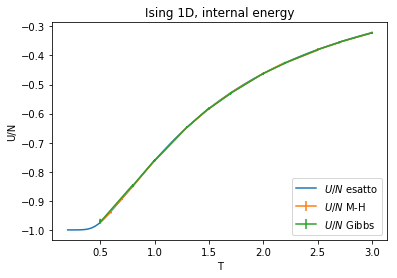

In [1]:
import numpy as np
import matplotlib.pyplot as plt

bmh,tmh,ymh,errymh = np.loadtxt("M-H/outputMH.ene.0",unpack=True)
bgb,tgb,ygb,errygb = np.loadtxt("gibbs/outputGibbs.ene.0",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )


plt.plot(T, e, label='$U/N$ esatto')
plt.errorbar(tmh,ymh,yerr=errymh, label='$U/N$ M-H')
plt.errorbar(tgb,ygb,yerr=errygb, label='$U/N$ Gibbs')
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N') 
plt.legend(loc ='lower right')

plt.show()




### Calore specifico

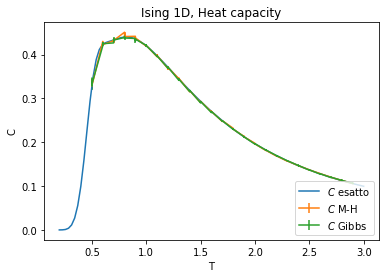

In [10]:
import numpy as np
import matplotlib.pyplot as plt

bmh,tmh,ymh,errymh = np.loadtxt("M-H/outputMH.Heat.0",unpack=True)
bgb,tgb,ygb,errygb = np.loadtxt("gibbs/outputGibbs.Heat.0",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.plot(T, heat, label='$C$ esatto')
plt.errorbar(tmh,ymh,yerr=errymh, label='$C$ M-H')
plt.errorbar(tgb,ygb,yerr=errygb, label='$C$ Gibbs')
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C') 
plt.legend(loc ='lower right')

plt.show()


### Suscettività 

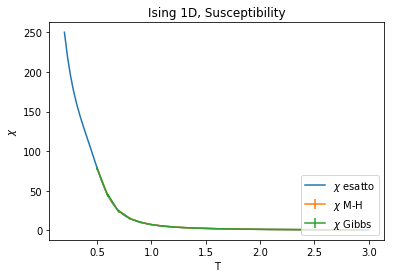

In [11]:
import numpy as np
import matplotlib.pyplot as plt

bmh,tmh,ymh,errymh = np.loadtxt("M-H/outputMH.Chi.0",unpack=True)
bgb,tgb,ygb,errygb = np.loadtxt("gibbs/outputGibbs.Chi.0",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns


X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


plt.plot(T, X, label='$\chi$ esatto')
plt.errorbar(tmh,ymh,yerr=errymh, label='$\chi$ M-H')
plt.errorbar(tgb,ygb,yerr=errygb, label='$\chi$ Gibbs')
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$') 
plt.legend(loc ='lower right')

plt.show()




### Magnetizzazione

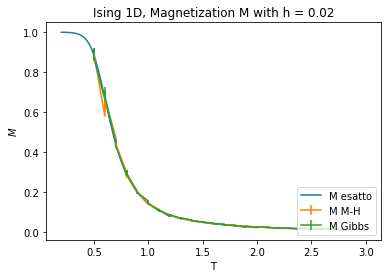

In [14]:
import numpy as np
import matplotlib.pyplot as plt

bmh,tmh,ymh,errymh = np.loadtxt("M-H/outputMH.Mag.0",unpack=True)
bgb,tgb,ygb,errygb = np.loadtxt("gibbs/outputGibbs.Mag.0",unpack=True)

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns


h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


plt.plot(T, M, label='M esatto')
plt.errorbar(tmh,ymh,yerr=errymh, label='M M-H')
plt.errorbar(tgb,ygb,yerr=errygb, label='M Gibbs')
plt.title('Ising 1D, Magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$') 
plt.legend(loc ='lower right')

plt.show()


Le misure sono state ricavate dopo avere equilibrato il sistema.

### Equilibrazione

Equilibrazione significa che la probilità media di trovare il nostro sistema in ogni particolare stato $\mu$ è proporzionale al peso di Boltzmann $p(\mu)$ di quello stato, cioè stiamo correttamente campionando $p(\mu)$.

Per capire se un sistema ha raggiunto l'equilibrio è stato osservato l'andamento su un grafico delle quantità macroscopiche di interesse in funzione del tempo

### Errori 

- Errori statistici : Il metodo più semplice per stimare questi errori è utilizzare il data blocking, cioè dividire il set di misure ottenute per una certa quantità in blocchi. Si calcola la media separatamente in ogni blocco e lo spread tra i valori in differenti blocchi da la stima dell'errore. Il metodo funziona perchè anche se le grandezze all'interno del blocco sono correlate, la media nei diversi blocchi sono scorrelate e quindi si può utilizzare il teorema del limite centrale.

- Errori sistematici : La causa principale di questi errori, parlando di codici MCMC, è il fatto che si aspetta solo un tempo finito affinchè il sistema raggiunga l'equilibrio. Sono errori difficili da gestire.